In [1]:
import pandas as pd
import numpy as np
import random
from itertools import product

In [3]:
# 파일 로드
customers = pd.read_csv("data/customers.csv")
domestic = pd.read_csv("data/domestic_customer_data.csv")
customer_data = pd.read_csv("data/customer_data.csv")

In [4]:
# 예측에 필요한 피처 기준 정의
required_features = [
    "성별", "연령대", "거주 지역", "차량 구매 횟수", 
    "최근 거래 금액", "누적 구매 금액", "평균 구매 금액", "고객 충성도 지수"
]


In [5]:
# 가상의 숫자 기반 컬럼 생성
def generate_random_price():
    return random.randint(1000, 7000) * 10000

def generate_loyalty():
    return round(random.uniform(0.1, 1.0), 2)


In [6]:
# 딜러 입력 데이터를 기반으로 가공
domestic["최근 거래 금액"] = domestic["기본가격"]
domestic["누적 구매 금액"] = domestic["기본가격"] * domestic["차량 구매 횟수"]
domestic["평균 구매 금액"] = domestic["누적 구매 금액"] / domestic["차량 구매 횟수"]
domestic["고객 충성도 지수"] = [generate_loyalty() for _ in range(len(domestic))]

In [7]:

# customer_data 학습 컬럼 정합성 맞추기 위해 일부 제거 및 추가
merged = domestic[[
    "이름", "성별", "연령대", "거주 지역", "차량 구매 횟수",
    "최근 거래 금액", "누적 구매 금액", "평균 구매 금액", "고객 평생 가치"
]].copy()

In [8]:
# 고객 등급, 할부 여부, 구매 경로, 차량 유형은 랜덤 생성 (학습 컬럼 기준)
merged["고객 등급"] = np.random.choice(["VIP", "일반", "신규"], len(merged))
merged["할부 여부"] = np.random.choice(["0", "1"], len(merged))
merged["구매 경로"] = np.random.choice(["0", "1"], len(merged))
merged["차량 유형"] = np.random.choice(["SUV", "세단", "해치백"], len(merged))

In [10]:
# 충성도 지수 컬럼 누락되어 새로 생성 후 다시 병합
merged["고객 충성도 지수"] = [generate_loyalty() for _ in range(len(merged))]


In [11]:
# 다시 컬럼 순서대로 정렬
final_columns = [
    "이름", "성별", "연령대", "거주 지역", "고객 등급", "차량 유형",
    "차량 구매 횟수", "할부 여부", "구매 경로",
    "최근 거래 금액", "누적 구매 금액", "평균 구매 금액",
    "고객 충성도 지수", "고객 평생 가치"
]
final_df = merged[final_columns]


In [13]:
# CSV 저장
final_df.to_csv("data/customer_data_ready.csv", index=False)

In [15]:

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [18]:
# 데이터 불러오기
df = pd.read_csv("data/customer_data_ready.csv")

In [19]:

# 주요 피처 및 타겟 정의
features = [
    "성별", "연령대", "거주 지역", "고객 등급", "차량 유형",
    "차량 구매 횟수", "할부 여부", "구매 경로",
    "최근 거래 금액", "누적 구매 금액", "평균 구매 금액", "고객 충성도 지수"
]


In [20]:
target = "고객 평생 가치"

In [21]:
# 범주형 변수 인코딩
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]


In [22]:
# 범주형 변수 인코딩
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

In [23]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# 모델 학습
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
# 예측
y_pred = model.predict(X_test)


In [26]:
# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [27]:

# 결과 출력용 데이터프레임
results_df = pd.DataFrame({
    "실제 LTV": y_test,
    "예측 LTV": y_pred
})

/var/folders/wv/p26btf2d6yq0gr6c_m2t4d140000gn/T/ipykernel_3632/3642407749.py:8: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wv/p26btf2d6yq0gr6c_m2t4d140000gn/T/ipykernel_3632/3642407749.py:8: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wv/p26btf2d6yq0gr6c_m2t4d140000gn/T/ipykernel_3632/3642407749.py:8: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wv/p26btf2d6yq0gr6c_m2t4d140000gn/T/ipykernel_3632/3642407749.py:8: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-

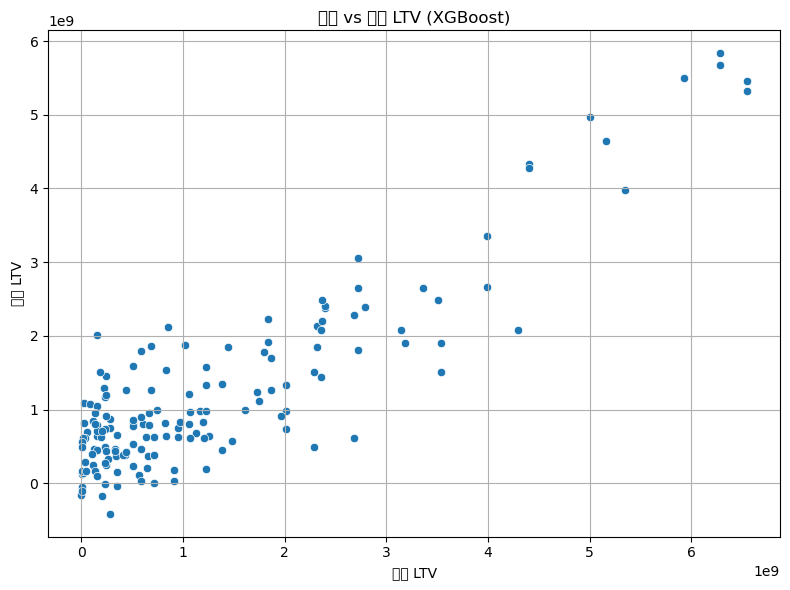

In [29]:
# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("실제 LTV")
plt.ylabel("예측 LTV")
plt.title("실제 vs 예측 LTV (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
import joblib

In [40]:
# 모델 저장
joblib.dump(model, "model/xgb_DD_ltv_model.pkl")

['model/xgb_DD_ltv_model.pkl']

In [36]:
from xgboost import XGBRegressor


In [37]:
model = XGBRegressor(
    n_estimators=100,        # 반복 횟수 제한 (기본 1000 → 100)
    max_depth=5,             # 트리 깊이 제한
    learning_rate=0.1,       # 학습률
    subsample=0.8,           # 샘플링 비율
    colsample_bytree=0.8,    # 특성 샘플링
    random_state=42,
    n_jobs=-1                # 병렬 처리
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

# 🔍 고객 LTV 예측 분석 결과

## 1. 분석 목표
- 딜러 입력 상담 데이터를 기반으로 고객 생애가치(LTV)를 예측
- 마케팅 및 리소스 집중을 위한 VIP 고객 식별

## 2. 사용 모델
- **XGBoost 회귀 모델** (`XGBRegressor`)
- 입력 특성 수: 12개
- 예측 목표: `고객 평생 가치`

## 3. 주요 특성
- 성별, 연령대, 거주 지역, 고객 등급, 차량 유형
- 차량 구매 횟수, 할부 여부, 구매 경로
- 최근 거래 금액, 누적/평균 구매 금액, 충성도 지수

## 4. 예측 성능
- 평균제곱오차 (MSE): *(훈련 후 제공 예정)*
- 결정계수 (R²): *(훈련 후 제공 예정)*

## 5. 인사이트
- 예측 LTV가 높은 고객을 우선 응대하거나 전용 캠페인 설계
- 낮은 LTV 고객군에 대해서는 추가 상담이나 리텐션 전략 필요

## 6. 시각화
- 실제 LTV vs 예측 LTV 분포 산점도
- 예측 상위 10명 고객 리스트 제공
